**HIV Model**

Abigail Nordwall

In [137]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [138]:
## u=unifected, l=latently infected, a=activly infected, v=virons
init = State(u = 200,
            l = 0,
            a = 0,
            v = 100)



,values
u,200
l,0
a,0
v,100


In [139]:
system = System(t0 = 0,
                gamma = 1.36,
               mu = 0.00136,
               tau = 0.2,
               beta = 0.00027,
               rho = 0.1,
               alpha = 0.036,
               sigma = 2,
               delta = 0.33,
               pi = 100,
               dt = 0.5)

,values
t0,0.00000
gamma,1.36000
mu,0.00136
tau,0.20000
beta,0.00027
rho,0.10000
alpha,0.03600
sigma,2.00000
delta,0.33000
pi,100.00000


In [140]:
def update_func(init, system, t):

    U, L, A, V = init

    unpack(system)
    
    dudt = ((gamma*tau) - (mu*U) - (beta*U*V))
    dldt = ((rho*beta*U*V) - (mu*L) - (alpha*L))
    dadt = (((1-rho)*beta*U*V) + (alpha*L) - (delta*A))
    dvdt = ((pi*A) - (sigma*V))
    
    
    U += dudt * dt
    L += dldt * dt
    A += dadt * dt
    V += dvdt * dt

    return State(u=U, l=L, a=A , v=V)

In [144]:
def run(update_func, system):
    
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, 120, dt):
        frame.row[t+dt] = update_func(frame.row[t], system, t)
    
    return frame
    
    

In [145]:
data = run(update_func, system)
print()

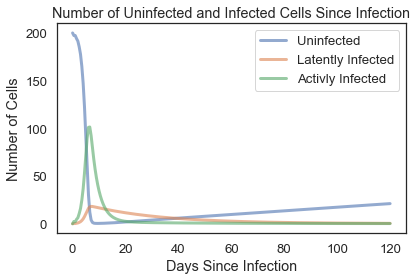

In [158]:
plot(data.u, label='Uninfected')
plot(data.l, label='Latently Infected')
plot(data.a, label='Activly Infected')

decorate(xlabel='Days Since Infection',
        ylabel='Number of Cells', 
        title='Number of Uninfected and Infected Cells Since Infection')